In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fact_df = pd.read_csv('data/fact_table.csv', encoding='ISO-8859-1')
customer_df = pd.read_csv('data/customer_dim.csv', encoding='ISO-8859-1')
item_df = pd.read_csv('data/item_dim.csv', encoding='ISO-8859-1')
store_df = pd.read_csv('data/store_dim.csv', encoding='ISO-8859-1')
time_df = pd.read_csv('data/time_dim.csv', encoding='ISO-8859-1')

In [6]:
df = (
    fact_df.merge(time_df, how='left', on='time_key')
    .merge(item_df, how='left', on='item_key')
    .merge(customer_df, how='left', on='coustomer_key')
)

In [7]:
df.isna().sum()

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit_x           3723
unit_price_x        0
total_price         0
date                0
hour                0
day                 0
week                0
month               0
quarter             0
year                0
item_name           0
desc                0
unit_price_y        0
man_country         0
supplier            0
unit_y           3723
name             2990
contact_no          0
nid                 0
dtype: int64

In [8]:
df.shape[0]

1000000

In [9]:
customer_df.shape[0]

9191

In [10]:
df['coustomer_key'].nunique()

9191

In [11]:
item_df.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [12]:
store_df.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['minute'] = df['date'].dt.minute
df['date'] = pd.to_datetime(df['date'].dt.date)

In [14]:
df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,date,...,item_name,desc,unit_price_y,man_country,supplier,unit_y,name,contact_no,nid,minute
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,2016-04-26,...,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,priya,8801529462805,4543429591184,13
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,2018-06-11,...,Charmin Ultra Bath Tissue,Kitchen Supplies,26.0,Bangladesh,DENIMACH LTD,rolls,harpreet kaur,8801985295010,9673146002795,8
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,2016-11-19,...,Dole Fruit in Gel Cups 4.3 oz,Food - Healthy,12.5,poland,CHROMADURLIN S.A.S,ct,sonam,8801955748165,2335742897063,19
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,2020-02-01,...,Paper Bowls 20 oz Ultra Strong,Dishware - Bowls,14.0,Bangladesh,DENIMACH LTD,ct,rekha bai,8801927509185,4943555261118,0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,2014-07-15,...,Waterloo Sparkling Watermelon 12oz,a. Beverage Sparkling Water,8.0,poland,CHROMADURLIN S.A.S,cans,mamta devi,8801549045065,3602133066555,58


In [18]:
df.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_x', 'unit_price_x', 'total_price', 'date', 'hour',
       'day', 'week', 'month', 'quarter', 'year', 'item_name', 'desc',
       'unit_price_y', 'man_country', 'supplier', 'unit_y', 'name',
       'contact_no', 'nid', 'minute'],
      dtype='object')

In [19]:
df['desc'].nunique()

30

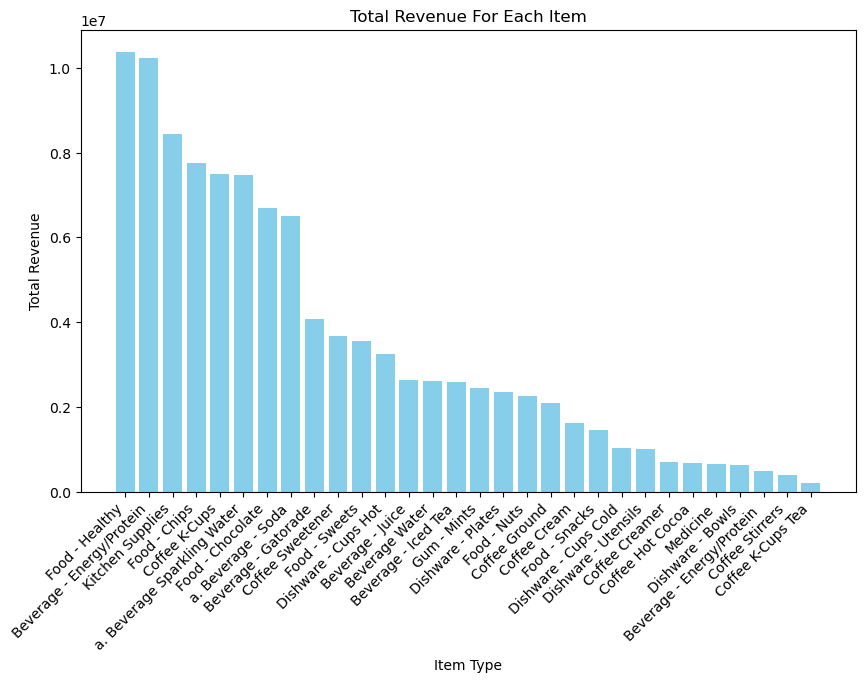

In [20]:
avg_price_by_type = df.groupby('desc')['total_price'].sum().reset_index()
avg_price_by_type = avg_price_by_type.sort_values(by='total_price', ascending=False)

plt.figure(figsize=(10, 6))

plt.bar(avg_price_by_type['desc'], avg_price_by_type['total_price'], color='skyblue')

plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue For Each Item')
plt.xticks(rotation=45, ha='right')
plt.show()

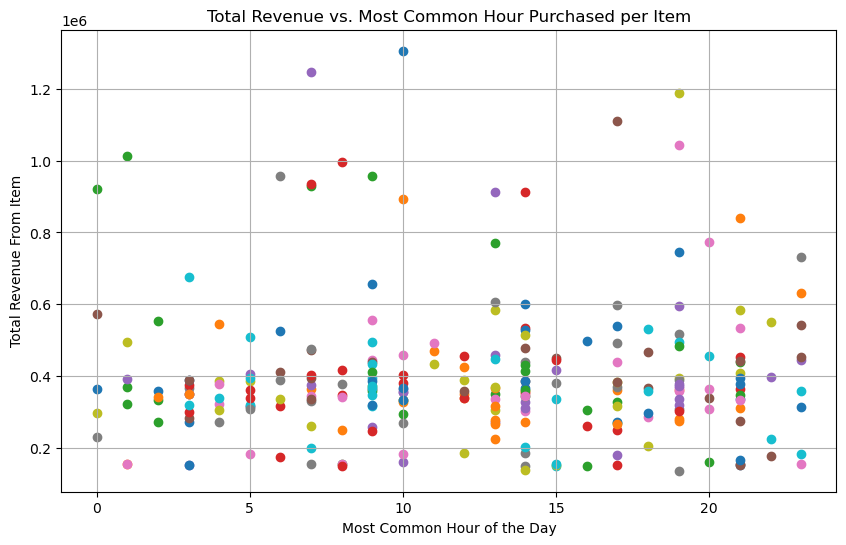

In [21]:
total_revenue = df.groupby('item_key')['total_price'].sum()

# Step 3: Identify Most Common Hour of the Day
most_common_hour = df.groupby(['item_key', 'hour']).size().reset_index(name='count')
most_common_hour = most_common_hour.loc[most_common_hour.groupby('item_key')['count'].idxmax()]

# Step 4: Create Scatter Plot
plt.figure(figsize=(10, 6))
for item_type, data in most_common_hour.groupby('item_key'):
    plt.scatter(data['hour'], total_revenue[item_type], label=item_type)

plt.xlabel('Most Common Hour of the Day')
plt.ylabel('Total Revenue From Item')
plt.title('Total Revenue vs. Most Common Hour Purchased per Item')
plt.grid(True)
plt.show()

In [22]:
df['item_key'].nunique()

264

In [23]:
df['coustomer_key'].nunique()

9191

In [24]:
df['total_purchases'] = df.groupby('coustomer_key')['coustomer_key'].transform('count')

In [25]:
df['store_revenue'] = df.groupby('store_key')['total_price'].transform('sum')

In [26]:
df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,date,...,unit_price_y,man_country,supplier,unit_y,name,contact_no,nid,minute,total_purchases,store_revenue
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,2016-04-26,...,35.0,Netherlands,Bolsius Boxmeer,ct,priya,8801529462805,4543429591184,13,106,144283.75
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,2018-06-11,...,26.0,Bangladesh,DENIMACH LTD,rolls,harpreet kaur,8801985295010,9673146002795,8,106,136882.75
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,2016-11-19,...,12.5,poland,CHROMADURLIN S.A.S,ct,sonam,8801955748165,2335742897063,19,104,148764.00
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,2020-02-01,...,14.0,Bangladesh,DENIMACH LTD,ct,rekha bai,8801927509185,4943555261118,0,110,144331.75
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,2014-07-15,...,8.0,poland,CHROMADURLIN S.A.S,cans,mamta devi,8801549045065,3602133066555,58,117,153342.50


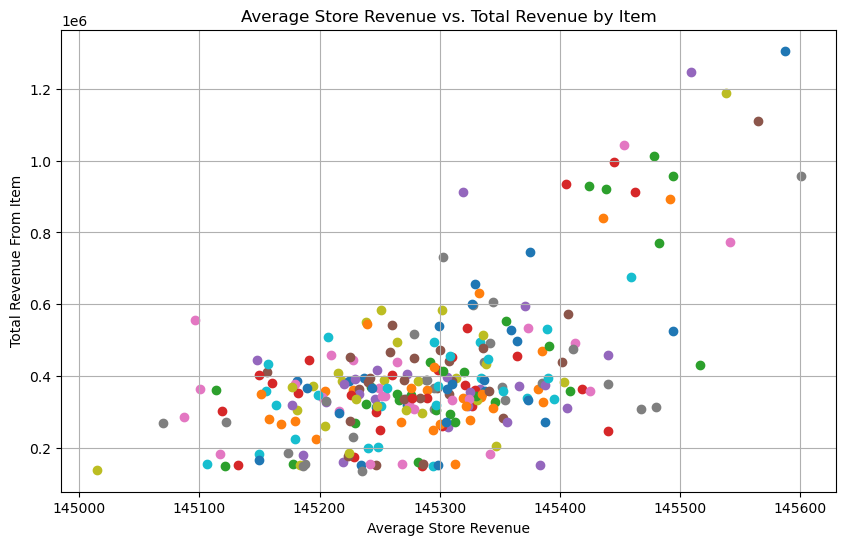

In [27]:
average_store_total_revenue = df.groupby('item_key').agg({'store_revenue': 'mean', 'total_price': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
for index, row in average_store_total_revenue.iterrows():
    plt.scatter(row['store_revenue'], row['total_price'], label=row['item_key'])

plt.xlabel('Average Store Revenue')
plt.ylabel('Total Revenue From Item')
plt.title('Average Store Revenue vs. Total Revenue by Item')
plt.grid(True)
plt.show()

In [35]:
product_store_counts = df.groupby('item_key')['store_key'].nunique().reset_index()
product_store_counts.columns = ['item_key', 'unique_store_count']
df = df.merge(product_store_counts, on='item_key', how='left')

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

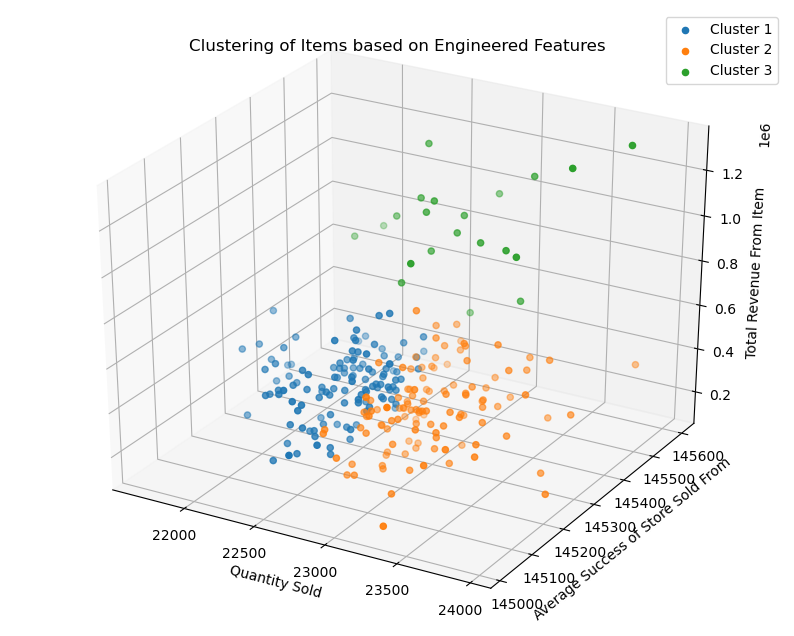

In [68]:
item_cluster_df = df.groupby('item_key').agg({'quantity': 'sum', 'store_revenue': 'mean', 'total_price': 'sum'})
item_keys = item_cluster_df.index
features = item_cluster_df[['quantity', 'store_revenue', 'total_price']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

item_cluster_mapping = dict(zip(item_keys, clusters))
df['cluster'] = df['item_key'].map(item_cluster_mapping)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    ax.scatter(features.iloc[clusters == cluster, 0],
               features.iloc[clusters == cluster, 1],
               features.iloc[clusters == cluster, 2],
               label=f'Cluster {cluster + 1}')

ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Average Success of Store Sold From')
ax.set_zlabel('Total Revenue From Item')
ax.set_title('Clustering of Items based on Engineered Features')
ax.legend()
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

cluster_labels = clusters

# Inertia (Sum of squared distances to closest centroid)
inertia = kmeans.inertia_

# Silhouette Score
silhouette = silhouette_score(scaled_features, cluster_labels)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

Inertia: 386.93278343706555
Silhouette Score: 0.28874915038464805
